## Title: Anomaly Detection on KDD Cup-99 Dataset (University of California, Irvine)
### Course: Information Security Analysis and Audit Project Component Review 2
### Mentor: Dr. Sivakumar N (SCOPE, VIT Vellore)
#### Team Members:
1) Jay Nitin Kaoshik (20BCT0258) <br>
2) Utkarsh Singh (20BCI0284) <br>
3) Mridul Madnani (20BDS0191) <br>
4) Rajeev Prakash (20BCI0062)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('./archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./archive\corrected.gz
./archive\kddcup.data.corrected
./archive\kddcup.data.gz
./archive\kddcup.data_10_percent.gz
./archive\kddcup.data_10_percent_corrected
./archive\kddcup.names
./archive\kddcup.newtestdata_10_percent_unlabeled.gz
./archive\kddcup.testdata.unlabeled.gz
./archive\kddcup.testdata.unlabeled_10_percent.gz
./archive\training_attack_types
./archive\typo-correction.txt
./archive\corrected\corrected
./archive\kddcup.data\kddcup.data
./archive\kddcup.data_10_percent\kddcup.data_10_percent
./archive\kddcup.newtestdata_10_percent_unlabeled\kddcup.newtestdata_10_percent_unlabeled
./archive\kddcup.testdata.unlabeled\kddcup.testdata.unlabeled
./archive\kddcup.testdata.unlabeled_10_percent\kddcup.testdata.unlabeled_10_percent


In [3]:
x = pd.read_csv('./archive/corrected.gz', compression='gzip', header=0, sep=',', quotechar='"')
x.to_csv('./PCAP.csv')


y = pd.read_csv('./archive/kddcup.testdata.unlabeled.gz', compression='gzip', header=0, sep=',', quotechar='"')
y.to_csv('./PCAPTest.csv')

In [4]:
!pip install scikit-learn

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

col_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 
             'dst_bytes','land', 'wrong_fragment', 'urgent', 'hot', 
             'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
             'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 
             'num_access_files', 'num_outbound_cmds', 'is_host_login', 
             'is_guest_login', 'count', 'srv_count', 'serror_rate', 
             'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 
             'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 
             'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
             'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
             'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 
             'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
             'dst_host_srv_rerror_rate', 'label']
data = pd.read_csv('./PCAP.csv', header=None, names=col_names, low_memory=False)

#drops rows that contain null values
df = data.dropna()

#returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column
df.describe()
df['is_host_login'].head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 311029 entries, nan to 311027.0
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     311029 non-null  int64  
 1   protocol_type                311029 non-null  object 
 2   service                      311029 non-null  object 
 3   flag                         311029 non-null  object 
 4   src_bytes                    311029 non-null  int64  
 5   dst_bytes                    311029 non-null  int64  
 6   land                         311029 non-null  float64
 7   wrong_fragment               311029 non-null  float64
 8   urgent                       311029 non-null  float64
 9   hot                          311029 non-null  float64
 10  num_failed_logins            311029 non-null  float64
 11  logged_in                    311029 non-null  float64
 12  num_compromised              311029 non-null  float6

In [6]:
df['protocol_type'] = df['protocol_type'].replace('udp', '0')
df['protocol_type'] = df['protocol_type'].replace('tcp', '1')
df['protocol_type'] = df['protocol_type'].replace('icmp', '2')

df['service'] = df['service'].replace('private', '0')
df['service'] = df['service'].replace('domain_u', '1')
df['service'] = df['service'].replace('http', '2')
df['service'] = df['service'].replace('smtp', '3')
df['service'] = df['service'].replace('ftp_data', '4')
df['service'] = df['service'].replace('ftp', '5')
df['service'] = df['service'].replace('eco_i', '6')
df['service'] = df['service'].replace('other', '7')
df['service'] = df['service'].replace('auth', '8')
df['service'] = df['service'].replace('ecr_i', '9')
df['service'] = df['service'].replace('IRC', '10')
df['service'] = df['service'].replace('X11', '11')
df['service'] = df['service'].replace('finger', '12')
df['service'] = df['service'].replace('time', '13')
df['service'] = df['service'].replace('domain', '14')
df['service'] = df['service'].replace('telnet', '15')
df['service'] = df['service'].replace('pop_3', '16')
df['service'] = df['service'].replace('ldap', '17')
df['service'] = df['service'].replace('login', '18')
df['service'] = df['service'].replace('name', '19')
df['service'] = df['service'].replace('ntp_u', '20')
df['service'] = df['service'].replace('http_443', '21')
df['service'] = df['service'].replace('sunrpc', '22')
df['service'] = df['service'].replace('printer', '23')
df['service'] = df['service'].replace('systat', '24')
df['service'] = df['service'].replace('tim_i', '25')
df['service'] = df['service'].replace('netstat', '26')
df['service'] = df['service'].replace('remote_job', '27')
df['service'] = df['service'].replace('link', '28')
df['service'] = df['service'].replace('urp_i', '29')
df['service'] = df['service'].replace('sql_net', '30')
df['service'] = df['service'].replace('bgp', '31')
df['service'] = df['service'].replace('pop_2', '32')
df['service'] = df['service'].replace('tftp_u', '33')
df['service'] = df['service'].replace('uucp', '34')
df['service'] = df['service'].replace('imap4', '35')
df['service'] = df['service'].replace('pm_dump', '36')
df['service'] = df['service'].replace('nnsp', '37')
df['service'] = df['service'].replace('courier', '38')
df['service'] = df['service'].replace('daytime', '39')
df['service'] = df['service'].replace('iso_tsap', '40')
df['service'] = df['service'].replace('echo', '41')
df['service'] = df['service'].replace('discard', '42')
df['service'] = df['service'].replace('ssh', '43')
df['service'] = df['service'].replace('whois', '44')
df['service'] = df['service'].replace('mtp', '45')
df['service'] = df['service'].replace('gopher', '46')
df['service'] = df['service'].replace('rje', '47')
df['service'] = df['service'].replace('ctf', '48')
df['service'] = df['service'].replace('supdup', '49')
df['service'] = df['service'].replace('hostnames', '50')
df['service'] = df['service'].replace('csnet_ns', '51')
df['service'] = df['service'].replace('uucp_path', '52')
df['service'] = df['service'].replace('nntp', '53')
df['service'] = df['service'].replace('netbios_ns', '54')
df['service'] = df['service'].replace('netbios_dgm', '55')
df['service'] = df['service'].replace('netbios_ssn', '56')
df['service'] = df['service'].replace('vmnet', '57')
df['service'] = df['service'].replace('Z39_50', '58')
df['service'] = df['service'].replace('exec', '59')
df['service'] = df['service'].replace('shell', '60')
df['service'] = df['service'].replace('efs', '61')
df['service'] = df['service'].replace('klogin', '62')
df['service'] = df['service'].replace('kshell', '63')
df['service'] = df['service'].replace('icmp', '64')

df['flag'] = df['flag'].replace('SF', '0')
df['flag'] = df['flag'].replace('SH', '1')
df['flag'] = df['flag'].replace('RSTR', '2')
df['flag'] = df['flag'].replace('REJ', '3')
df['flag'] = df['flag'].replace('S0', '4')
df['flag'] = df['flag'].replace('S1', '5')
df['flag'] = df['flag'].replace('S2', '6')
df['flag'] = df['flag'].replace('S3', '7')
df['flag'] = df['flag'].replace('RSTO', '8')
df['flag'] = df['flag'].replace('RSTOS0', '9')
df['flag'] = df['flag'].replace('OTH', '10')


df['label'] = df['label'].replace(['back.', 'land.', 'neptune.', 'pod.','smurf.', 'teardrop.', 'apache2.','udpstorm.','processtable.', 'worm.'], '1') 
#10 DoS

df['label'] = df['label'].replace(['satan.', 'ipsweep.', 'nmap.', 'portsweep.', 'mscan.', 'saint.'], '2') 
#6 Probe

df['label'] = df['label'].replace(['guess_passwd.', 'ftp_write.', 'imap.', 'phf.', 'multihop.', 'warezmaster.', 'warezclient.', 'spy.', 'xlock.', 'xsnoop.', 'snmpguess.', 'snmpgetattack.', 'httptunnel.', 'sendmail.', 'named.', 'mailbomb.'], '3') 
#16 R2L

df['label'] = df['label'].replace(['buffer_overflow.', 'loadmodule.', 'rootkit.', 'perl.', 'sqlattack.', 'xterm.', 'ps.'], '4') 
#7 U2R

df['label'] = df['label'].replace('normal.', '0')
#1 Normal

df = df.drop(df.index[:2])

#Gives the information about first 10 records.
df.head(10)

#converts non-essential non-numeric datafields into numeric datafields. 
df["protocol_type"] = pd.to_numeric(df["protocol_type"])
df["service"] = pd.to_numeric(df["service"])
df["flag"]= pd.to_numeric(df["flag"])
df["label"] = pd.to_numeric(df["label"])
df["dst_host_srv_rerror_rate"] = pd.to_numeric(df["dst_host_srv_rerror_rate"])
df["dst_host_rerror_rate"] = pd.to_numeric(df["dst_host_rerror_rate"])
df["dst_host_srv_serror_rate"] = pd.to_numeric(df["dst_host_srv_serror_rate"])
df["dst_host_serror_rate"] = pd.to_numeric(df["dst_host_serror_rate"])
df["dst_host_srv_diff_host_rate"] = pd.to_numeric(df["dst_host_srv_diff_host_rate"])
df["dst_host_same_src_port_rate"] = pd.to_numeric(df["dst_host_same_src_port_rate"])
df["dst_host_same_srv_rate"] = pd.to_numeric(df["dst_host_same_srv_rate"])
df["srv_diff_host_rate"] = pd.to_numeric(df["srv_diff_host_rate"])
df["diff_srv_rate"] = pd.to_numeric(df["diff_srv_rate"])
df["srv_serror_rate"]= pd.to_numeric(df["srv_serror_rate"])
df["srv_rerror_rate"]= pd.to_numeric(df["srv_rerror_rate"])
df["rerror_rate"]= pd.to_numeric(df["rerror_rate"])

#displays the number of columns corresponding to a particular datatype.
df.info()

# df.head(10)


<class 'pandas.core.frame.DataFrame'>
Float64Index: 311027 entries, 1.0 to 311027.0
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     311027 non-null  int64  
 1   protocol_type                311027 non-null  int64  
 2   service                      311027 non-null  int64  
 3   flag                         311027 non-null  int64  
 4   src_bytes                    311027 non-null  int64  
 5   dst_bytes                    311027 non-null  int64  
 6   land                         311027 non-null  float64
 7   wrong_fragment               311027 non-null  float64
 8   urgent                       311027 non-null  float64
 9   hot                          311027 non-null  float64
 10  num_failed_logins            311027 non-null  float64
 11  logged_in                    311027 non-null  float64
 12  num_compromised              311027 non-null  float6

In [7]:
#drops the label entry from the dataframe
data = df.drop('label', axis=1)
label = pd.DataFrame(df['label'])

#dividing the data into testing and training sets.
X_train, X_test, y_train, y_test = train_test_split(data, label,test_size=0.2)
df.to_csv("./clean_labeled.csv", 
          index=False)
X_train.to_csv("./train_data.csv", 
           index=False)
y_train.to_csv("./train_label.csv", 
           index=False)
X_test.to_csv("./test_data.csv", 
           index=False)
y_test.to_csv("./test_label.csv", 
           index=False)

In [8]:
#finds unique value counts of label.
df['label'].value_counts()

1    224855
0     60591
3     21345
2      4166
4        70
Name: label, dtype: int64

<Figure size 432x288 with 0 Axes>

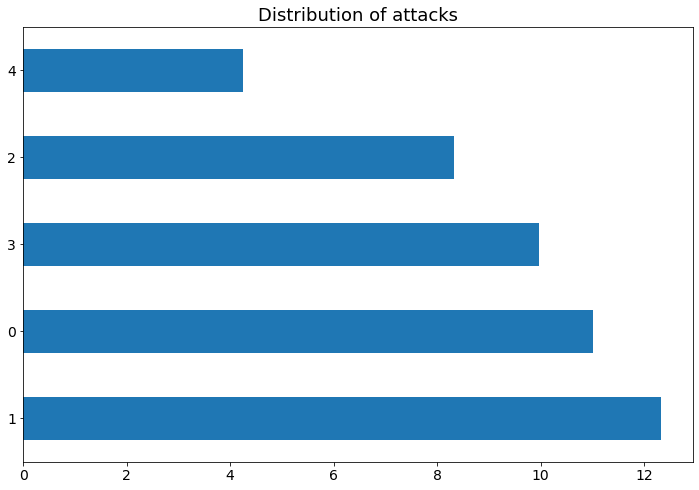

In [9]:
#clears current figure
plt.clf()

#sets the figure size
plt.figure(figsize=(12, 8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')

#Y axis denotes the label type/ type of attack and the x-axis denotes the log base e of the number of attacks.
df['label'].value_counts().apply(np.log).plot(kind='barh')

plt.show()

In [10]:
col_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 
             'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 
             'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
             'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 
             'num_access_files', 'num_outbound_cmds', 'is_host_login', 
             'is_guest_login', 'count', 'srv_count', 'serror_rate', 
             'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 
             'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 
             'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
             'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
             'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 
             'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
             'dst_host_srv_rerror_rate']
data = pd.read_csv('./PCAPTest.csv',
                  header=None, names=col_names, low_memory=False)
df = data.dropna()
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
NaN,0,udp,private,SF,105,146,0.1,0.2,0.3,0.4,...,1.2,1.3,1.00.1,0.00.6,1.00.2,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11
0.0,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255.0,254.0,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255.0,254.0,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255.0,254.0,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255.0,254.0,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0
4.0,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255.0,254.0,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0
5.0,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255.0,254.0,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255.0,253.0,0.99,0.01,0.01,0.0,0.0,0.0,0.0,0.0
7.0,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255.0,253.0,0.99,0.01,0.01,0.0,0.0,0.0,0.0,0.0
8.0,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255.0,254.0,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df['protocol_type'] = df['protocol_type'].replace('udp', '0')
df['protocol_type'] = df['protocol_type'].replace('tcp', '1')
df['protocol_type'] = df['protocol_type'].replace('icmp', '2')

df['service'] = df['service'].replace('private', '0')
df['service'] = df['service'].replace('domain_u', '1')
df['service'] = df['service'].replace('http', '2')
df['service'] = df['service'].replace('smtp', '3')
df['service'] = df['service'].replace('ftp_data', '4')
df['service'] = df['service'].replace('ftp', '5')
df['service'] = df['service'].replace('eco_i', '6')
df['service'] = df['service'].replace('other', '7')
df['service'] = df['service'].replace('auth', '8')
df['service'] = df['service'].replace('ecr_i', '9')
df['service'] = df['service'].replace('IRC', '10')
df['service'] = df['service'].replace('X11', '11')
df['service'] = df['service'].replace('finger', '12')
df['service'] = df['service'].replace('time', '13')
df['service'] = df['service'].replace('domain', '14')
df['service'] = df['service'].replace('telnet', '15')
df['service'] = df['service'].replace('pop_3', '16')
df['service'] = df['service'].replace('ldap', '17')
df['service'] = df['service'].replace('login', '18')
df['service'] = df['service'].replace('name', '19')
df['service'] = df['service'].replace('ntp_u', '20')
df['service'] = df['service'].replace('http_443', '21')
df['service'] = df['service'].replace('sunrpc', '22')
df['service'] = df['service'].replace('printer', '23')
df['service'] = df['service'].replace('systat', '24')
df['service'] = df['service'].replace('tim_i', '25')
df['service'] = df['service'].replace('netstat', '26')
df['service'] = df['service'].replace('remote_job', '27')
df['service'] = df['service'].replace('link', '28')
df['service'] = df['service'].replace('urp_i', '29')
df['service'] = df['service'].replace('sql_net', '30')
df['service'] = df['service'].replace('bgp', '31')
df['service'] = df['service'].replace('pop_2', '32')
df['service'] = df['service'].replace('tftp_u', '33')
df['service'] = df['service'].replace('uucp', '34')
df['service'] = df['service'].replace('imap4', '35')
df['service'] = df['service'].replace('pm_dump', '36')
df['service'] = df['service'].replace('nnsp', '37')
df['service'] = df['service'].replace('courier', '38')
df['service'] = df['service'].replace('daytime', '39')
df['service'] = df['service'].replace('iso_tsap', '40')
df['service'] = df['service'].replace('echo', '41')
df['service'] = df['service'].replace('discard', '42')
df['service'] = df['service'].replace('ssh', '43')
df['service'] = df['service'].replace('whois', '44')
df['service'] = df['service'].replace('mtp', '45')
df['service'] = df['service'].replace('gopher', '46')
df['service'] = df['service'].replace('rje', '47')
df['service'] = df['service'].replace('ctf', '48')
df['service'] = df['service'].replace('supdup', '49')
df['service'] = df['service'].replace('hostnames', '50')
df['service'] = df['service'].replace('csnet_ns', '51')
df['service'] = df['service'].replace('uucp_path', '52')
df['service'] = df['service'].replace('nntp', '53')
df['service'] = df['service'].replace('netbios_ns', '54')
df['service'] = df['service'].replace('netbios_dgm', '55')
df['service'] = df['service'].replace('netbios_ssn', '56')
df['service'] = df['service'].replace('vmnet', '57')
df['service'] = df['service'].replace('Z39_50', '58')
df['service'] = df['service'].replace('exec', '59')
df['service'] = df['service'].replace('shell', '60')
df['service'] = df['service'].replace('efs', '61')
df['service'] = df['service'].replace('klogin', '62')
df['service'] = df['service'].replace('kshell', '63')
df['service'] = df['service'].replace('icmp', '64')
#df['service'] = df['service'].replace('harvest', '64')
#df['service'] = df['service'].replace('http_2784', '64')
#df['service'] = df['service'].replace('http_8001', '64')
#df['service'] = df['service'].replace('urh_i', '64')
#df['service'] = df['service'].replace('aol', '64')
df = df[df.service != 'harvest']
df = df[df.service != 'http_2784']
df = df[df.service != 'http_8001']
df = df[df.service != 'urh_i']
df = df[df.service != 'aol']
df['flag'] = df['flag'].replace('SF', '0')
df['flag'] = df['flag'].replace('SH', '1')
df['flag'] = df['flag'].replace('RSTR', '2')
df['flag'] = df['flag'].replace('REJ', '3')
df['flag'] = df['flag'].replace('S0', '4')
df['flag'] = df['flag'].replace('S1', '5')
df['flag'] = df['flag'].replace('S2', '6')
df['flag'] = df['flag'].replace('S3', '7')
df['flag'] = df['flag'].replace('RSTO', '8')
df['flag'] = df['flag'].replace('RSTOS0', '9')
df['flag'] = df['flag'].replace('OTH', '10')

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
NaN,0,0,0,0,105,146,0.1,0.2,0.3,0.4,...,1.2,1.3,1.00.1,0.00.6,1.00.2,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11
0.0,0,0,0,0,105,146,0.0,0.0,0.0,0.0,...,255.0,254.0,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0,0,0,0,105,146,0.0,0.0,0.0,0.0,...,255.0,254.0,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0,0,0,0,105,146,0.0,0.0,0.0,0.0,...,255.0,254.0,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0,0,0,0,105,146,0.0,0.0,0.0,0.0,...,255.0,254.0,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0


In [12]:
df = df.drop(df.index[:2])

df["protocol_type"] = pd.to_numeric(df["protocol_type"])
df["service"] = pd.to_numeric(df["service"])
df["flag"]= pd.to_numeric(df["flag"])
df["dst_host_srv_rerror_rate"]= pd.to_numeric(df["dst_host_srv_rerror_rate"])
df["dst_host_rerror_rate"]= pd.to_numeric(df["dst_host_rerror_rate"])
df["dst_host_srv_serror_rate"]= pd.to_numeric(df["dst_host_srv_serror_rate"])
df["dst_host_serror_rate"]= pd.to_numeric(df["dst_host_serror_rate"])
df["dst_host_srv_diff_host_rate"]= pd.to_numeric(df["dst_host_srv_diff_host_rate"])
df["dst_host_same_src_port_rate"]= pd.to_numeric(df["dst_host_same_src_port_rate"])
df["dst_host_diff_srv_rate"]= pd.to_numeric(df["dst_host_diff_srv_rate"])
df["dst_host_same_srv_rate"]= pd.to_numeric(df["dst_host_same_srv_rate"])
df["srv_diff_host_rate"]= pd.to_numeric(df["srv_diff_host_rate"])
df["diff_srv_rate"]= pd.to_numeric(df["diff_srv_rate"])
df["srv_rerror_rate"]= pd.to_numeric(df["srv_rerror_rate"])
df["rerror_rate"]= pd.to_numeric(df["rerror_rate"])
df["srv_serror_rate"]= pd.to_numeric(df["srv_serror_rate"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2984143 entries, 1.0 to 2984152.0
Data columns (total 41 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                int64  
 2   service                      int64  
 3   flag                         int64  
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         float64
 7   wrong_fragment               float64
 8   urgent                       float64
 9   hot                          float64
 10  num_failed_logins            float64
 11  logged_in                    float64
 12  num_compromised              float64
 13  root_shell                   float64
 14  su_attempted                 float64
 15  num_root                     float64
 16  num_file_creations           float64
 17  num_shells                   float64
 18  num_access_files             float64

### 1. Random Forest Classifier

In [13]:
#Random Forest Classifier
import pandas as pd
import numpy as np
import pickle as p
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X = pd.read_csv('./train_data.csv')
y = pd.read_csv('./train_label.csv')

#Normalizes the data of each row to fit it into a range of 0-1
scaler = Normalizer().fit(X)
x = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, 
                                                    random_state=0)
y_train = np.array(y_train)

#n_estimators denotes the number of decision trees to be derived
#max_depth denotes the depth of the trees.
#random_states controls the randomness of the bootstrapping of the samples used when building trees
model = RandomForestClassifier(n_estimators=20, max_depth=20, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=20, random_state=0)

In [14]:
y_pred = model.predict(X_test)

print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

Accuracy = 0.9795442671703573
Confusion Matrix =
 [[ 4586     0     3   281     0]
 [    0 17982     0     1     0]
 [    0     1   329     0     0]
 [  222     0     0  1473     0]
 [    1     0     0     0     4]]
Recall = 0.9795442671703573
Classification Report =
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      4870
           1       1.00      1.00      1.00     17983
           2       0.99      1.00      0.99       330
           3       0.84      0.87      0.85      1695
           4       1.00      0.80      0.89         5

    accuracy                           0.98     24883
   macro avg       0.96      0.92      0.94     24883
weighted avg       0.98      0.98      0.98     24883



In [15]:
!pip install scikit-plot

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

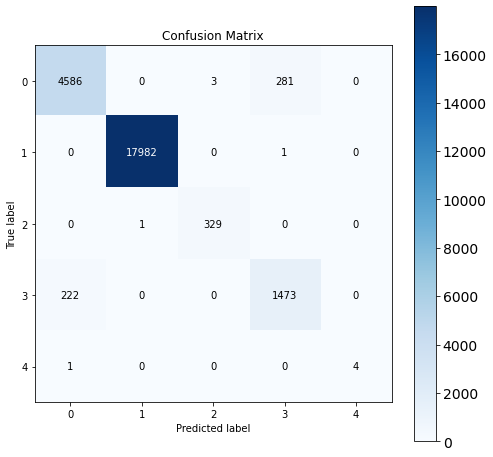

In [16]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(8,8))

In [17]:
file = "./randomForest.pkl"
with open(file, "wb") as f:
    p.dump(model, f)

### 2. Gaussian Naive Bayes Algorithm

In [18]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

In [19]:
X = pd.read_csv('./train_data.csv')
y = pd.read_csv('./train_label.csv')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, 
                                                    random_state=0)
y_train = np.array(y_train)

In [20]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [21]:
y_pred = model.predict(X_test)

In [22]:
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

Accuracy = 0.8508218462404051
Confusion Matrix =
 [[ 3181    63    40    69  1517]
 [    9 17543   265    46   120]
 [   10     1   307    12     0]
 [ 1152    10    18   135   380]
 [    0     0     0     0     5]]
Recall = 0.8508218462404051
Classification Report =
               precision    recall  f1-score   support

           0       0.73      0.65      0.69      4870
           1       1.00      0.98      0.99     17983
           2       0.49      0.93      0.64       330
           3       0.52      0.08      0.14      1695
           4       0.00      1.00      0.00         5

    accuracy                           0.85     24883
   macro avg       0.55      0.73      0.49     24883
weighted avg       0.90      0.85      0.87     24883



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

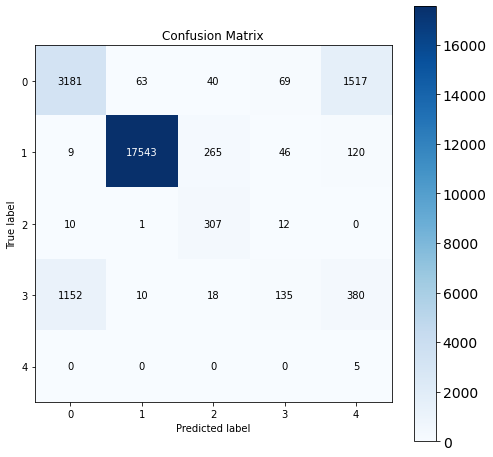

In [23]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred,
    figsize=(8,8))

### 3. AdaBoost Classifier

In [24]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier

In [25]:
X = pd.read_csv('./train_data.csv')
y = pd.read_csv('./train_label.csv')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, 
                                                    random_state=0)
y_train = np.array(y_train)

In [26]:
model = AdaBoostClassifier(n_estimators=50)
model.fit(X_train, y_train)

AdaBoostClassifier()

In [27]:
y_pred = model.predict(X_test)

In [28]:
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

Accuracy = 0.7485833701724068
Confusion Matrix =
 [[ 4573    48    46    94   109]
 [ 4450 13283   249     1     0]
 [   24     3   303     0     0]
 [ 1139    47    41   468     0]
 [    5     0     0     0     0]]
Recall = 0.7485833701724068
Classification Report =
               precision    recall  f1-score   support

           0       0.45      0.94      0.61      4870
           1       0.99      0.74      0.85     17983
           2       0.47      0.92      0.63       330
           3       0.83      0.28      0.41      1695
           4       0.00      0.00      0.00         5

    accuracy                           0.75     24883
   macro avg       0.55      0.57      0.50     24883
weighted avg       0.87      0.75      0.77     24883



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

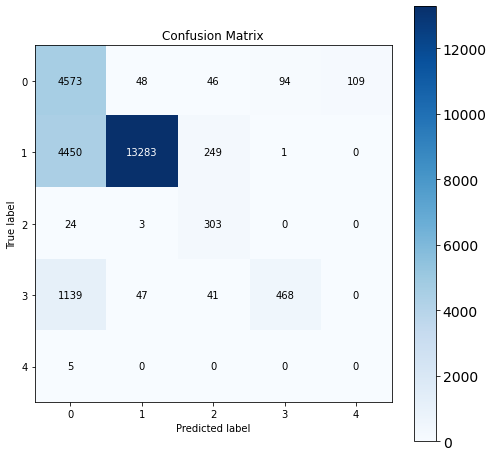

In [29]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred,
    figsize=(8,8))

### 4. Gradient Boosting Classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
X = pd.read_csv('./train_data.csv')
y = pd.read_csv('./train_label.csv')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, 
                                                    random_state=0)
y_train = np.array(y_train)

In [32]:
model = GradientBoostingClassifier(n_estimators=50)
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [33]:
y_pred = model.predict(X_test)

In [34]:
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

Accuracy = 0.9782180605232488
Confusion Matrix =
 [[ 4615     1     4   250     0]
 [    1 17981     1     0     0]
 [   12     1   315     2     0]
 [  261     0     4  1430     0]
 [    5     0     0     0     0]]
Recall = 0.9782180605232488
Classification Report =
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      4870
           1       1.00      1.00      1.00     17983
           2       0.97      0.95      0.96       330
           3       0.85      0.84      0.85      1695
           4       0.00      0.00      0.00         5

    accuracy                           0.98     24883
   macro avg       0.75      0.75      0.75     24883
weighted avg       0.98      0.98      0.98     24883



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

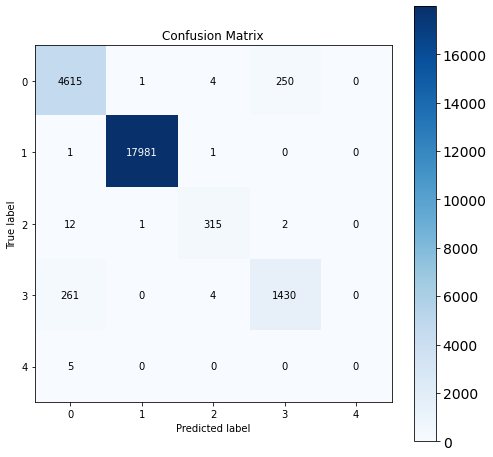

In [35]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred,
    figsize=(8,8))

### 5. Multi-Layer Perceptron

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
X = pd.read_csv('./train_data.csv')
y = pd.read_csv('./train_label.csv')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, 
                                                    random_state=0)
y_train = np.array(y_train)

In [38]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
model.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

In [39]:
y_pred = model.predict(X_test)

In [40]:
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

Accuracy = 0.9612586906723466
Confusion Matrix =
 [[ 4383    27    23   437     0]
 [    7 17957    10     9     0]
 [   10    46   268     6     0]
 [  368     2    14  1311     0]
 [    4     0     0     1     0]]
Recall = 0.9612586906723466
Classification Report =
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      4870
           1       1.00      1.00      1.00     17983
           2       0.85      0.81      0.83       330
           3       0.74      0.77      0.76      1695
           4       0.00      0.00      0.00         5

    accuracy                           0.96     24883
   macro avg       0.70      0.70      0.70     24883
weighted avg       0.96      0.96      0.96     24883



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

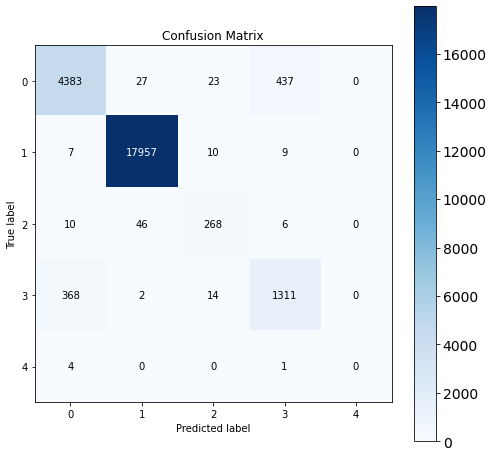

In [41]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred,
    figsize=(8,8))

### 6. XGBoost Classifier

In [42]:
!pip install xgboost

In [43]:
import xgboost as xgb

In [44]:
X = pd.read_csv('./train_data.csv')
y = pd.read_csv('./train_label.csv')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, 
                                                    random_state=0)
y_train = np.array(y_train)

In [45]:
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [46]:
y_pred = model.predict(X_test)

In [47]:
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

Accuracy = 0.9796246433307881
Confusion Matrix =
 [[ 4585     0     3   282     0]
 [    0 17982     0     1     0]
 [    0     1   329     0     0]
 [  220     0     0  1475     0]
 [    0     0     0     0     5]]
Recall = 0.9796246433307881
Classification Report =
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      4870
           1       1.00      1.00      1.00     17983
           2       0.99      1.00      0.99       330
           3       0.84      0.87      0.85      1695
           4       1.00      1.00      1.00         5

    accuracy                           0.98     24883
   macro avg       0.96      0.96      0.96     24883
weighted avg       0.98      0.98      0.98     24883

